# Question 1

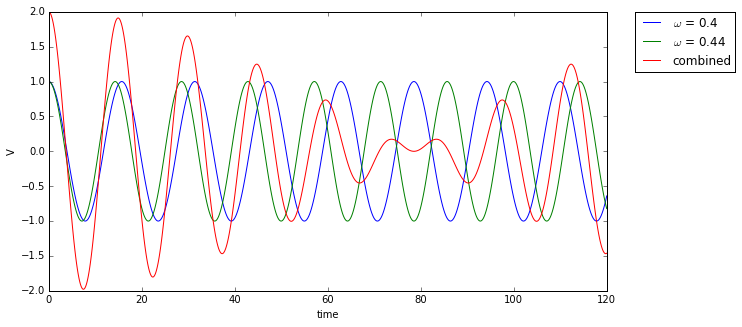

In [2]:
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
%matplotlib inline

elements = 10000

t = np.linspace(0,120, elements)
dw = 0.04
w = 0.4
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = 0.4')
plt.plot(t, x2, label=r'$\omega$ = 0.44')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

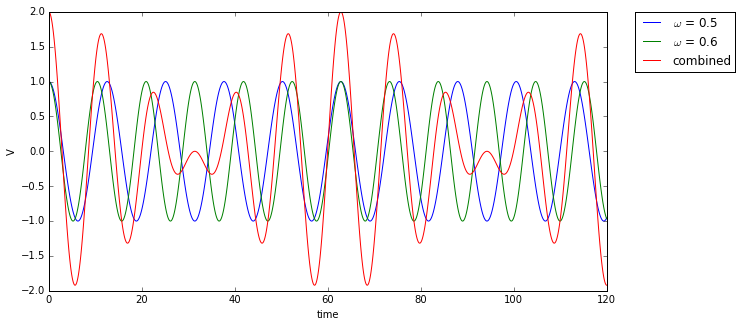

In [3]:
dw = 0.1
w = 0.5
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = 0.5')
plt.plot(t, x2, label=r'$\omega$ = 0.6')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

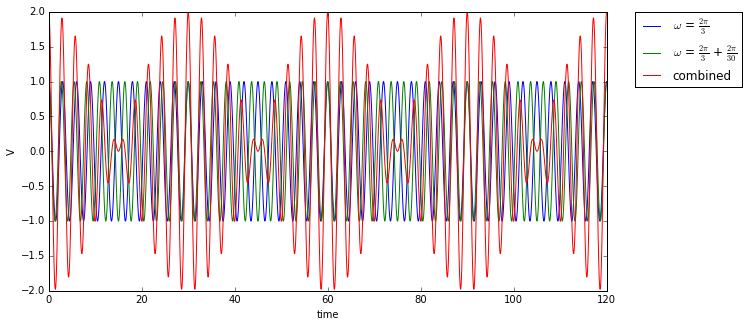

In [4]:
w = 2*m.pi/3
dw = 2*m.pi/30
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = $\frac{2\pi}{3}$')
plt.plot(t, x2, label=r'$\omega$ = $\frac{2\pi}{3}$ + $\frac{2\pi}{30}$')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

Comment about graph shape and stuff.

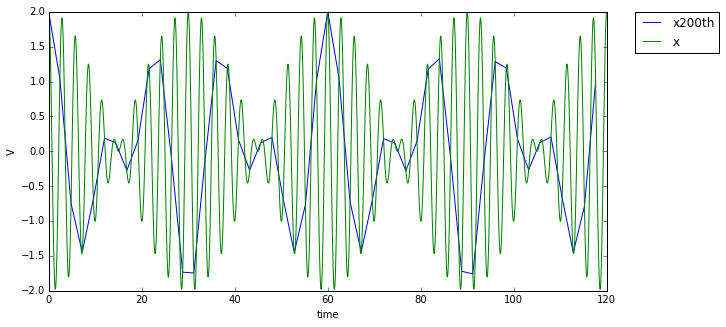

In [5]:
x200th = x[0:elements:200]
t200th = t[0:elements:200]

# x200th = np.zeros(elements/200)
# t200th = np.zeros(elements/200)
# for i in range(0, elements/200):
#     x200th[i] = x[i*200]
#     t200th[i] = t[i*200]

plt.figure(figsize=(10,5))
plt.plot(t200th, x200th, label="x200th")
plt.plot(t, x, label="x")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

We lose smoothness. You can still see the wave packet frequency of the signal, however the higher frequency data is lost, since the sampling frequency is lower that the signal frequency.

# Question 2

The mean of the coin toss would be:
    $ \frac{1}{2} \frac{2}{3} + \frac{-1}{2} \frac{1}{3} = \frac{1}{6}$

In [6]:
mean = (1.0/3.0) - (1.0/6.0)
var = (2.0/3.0)*(0.5 - mean)**2 + (1.0/3.0)*(-0.5 - mean)**2
print 'mean:\t\t' + str(mean)
print 'varience:\t' + str(var)
print 'stdeviation:\t' + str(var**2)

mean:		0.166666666667
varience:	0.222222222222
stdeviation:	0.0493827160494


(-1, 1)

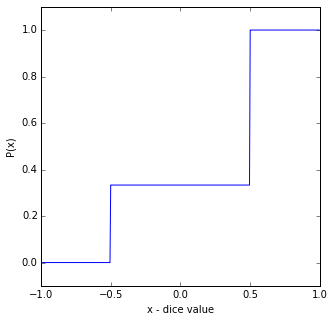

In [7]:
y = np.arange(-1.,1.,0.005)
P = y*0.
for i in range(-1,1,1):
    P[y>(-0.5)]=1./3.
for j in range(0,1,1):
    P[y>(0.5)]=1.
plt.figure(figsize=(5,5))
plt.plot(y,P)
plt.xlabel('x - dice value')
plt.ylabel('P(x)')
plt.ylim([-0.1,1.1])
plt.xlim([-1,1])

In [8]:
def unfaircoin(times):
    outcome = np.zeros(times+2)
    dist = np.random.randint(1,100,size=times)
    
#    out2=0.*dist+0.5
 #   out2[(dist%3==0)]=-0.5
#  ind = np.where((dist%3)==0)[0]
    
    for i in range(0,times, 1):
        if dist[i]%3 == 0:
            outcome[0] = outcome[0]+1
            outcome[i+2] = -0.5
        else:
            outcome[1] = outcome[1]+1
            outcome[i+2] = 0.5
    return outcome

In [9]:
def mkcmdbar(x, y, ax, tosses):
    #Plot
    ax.bar(x, [y[0], y[1]], 0.2, align='center')
    #Set plot labels
    ax.set_xlabel('n = '+str(tosses))
    ax.set_ylabel('tosses')
    ax.axis([-1., 1, 0, tosses])
    ax.plot([-1., 0.], [tosses/3., tosses/3.], "k--")
    ax.plot([0.,1.], [tosses*2./3., tosses*2./3.], "k--")
    #Return AX
    return ax

def mkhist(ax, tosses, buns):
    z = np.zeros(2000)
    for i in range(0,2000,1):
        z[i] = np.mean(unfaircoin(tosses)[2::1])
    n, bins, patches = ax.hist(z, buns, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, 0.16667, np.std(z))
    l = ax.plot(bincenters, y, 'r--', linewidth=2)
    ax.set_xlabel('n = '+str(tosses))
    ax.set_ylabel('tosses')
    return ax

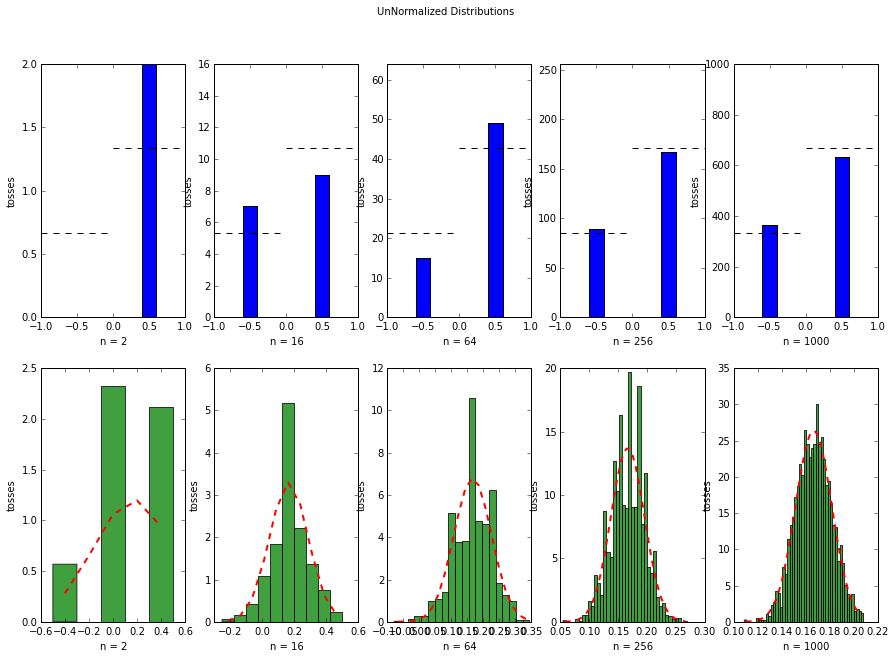

In [10]:
plt.figure(figsize=(15,10))
x = np.array([-0.5, 0.5])
plt.suptitle('UnNormalized Distributions')

ax1=plt.subplot(2,5,1)
bx1=plt.subplot(2,5,6)
tosses = 2
y = unfaircoin(tosses)
ax1=mkcmdbar(x, y, ax1, tosses)
bx1=mkhist(bx1, tosses, 5)

ax2=plt.subplot(2,5,2)
bx2=plt.subplot(2,5,7)
tosses = 16
y = unfaircoin(tosses)
ax2=mkcmdbar(x, y, ax2, tosses)
bx2=mkhist(bx2, tosses, 10)

ax3=plt.subplot(2,5,3)
bx3=plt.subplot(2,5,8)
tosses = 64
y = unfaircoin(tosses)
ax3=mkcmdbar(x, y, ax3, tosses)
bx3=mkhist(bx3, tosses, 20)

ax4=plt.subplot(2,5,4)
bx4=plt.subplot(2,5,9)
tosses = 256
y = unfaircoin(tosses)
ax4=mkcmdbar(x, y, ax4, tosses)
bx4=mkhist(bx4, tosses, 40)

ax5=plt.subplot(2,5,5)
bx5=plt.subplot(2,5,10)
tosses = 1000
y = unfaircoin(tosses)
ax5=mkcmdbar(x, y, ax5, tosses)
bx5=mkhist(bx5, tosses, 50)

Comment on how it approaches the expected value.

In [21]:
minutedata = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata = np.genfromtxt('http://web.uvic.ca/~jklymak/phy411/data/AllHourly.txt')[6,2:]
hourdata = hourdata[~np.isnan(hourdata)]
minutedata = minutedata[~np.isnan(minutedata)]


minute mean: 	 	10.3016961717
minute varience: 	35.8238733916

hour mean: 	 	10.3387280591
hour varience: 		36.8172572917


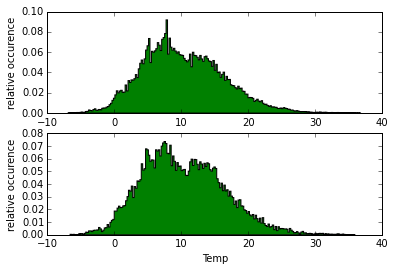

In [12]:
print "\nminute mean: \t \t" + str(np.mean(minutedata))
print "minute varience: \t" + str(np.var(minutedata)) + "\n"
print "hour mean: \t \t" + str(np.mean(hourdata))
print "hour varience: \t\t" + str(np.var(hourdata))

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
numBins = 200
ax.hist(minutedata,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

ax = fig.add_subplot(2,1,2)
ax.hist(hourdata, numBins, histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()

The histograms show a bimodal distrabution in both the minutely and hourly data sets. I suspect this is a result of a daytime value and a nighttime value.


3pm mean: 	11.0903119343
3pm varience: 	39.7159844224

5am mean: 	10.0081319402
5am varience: 	35.8934114718


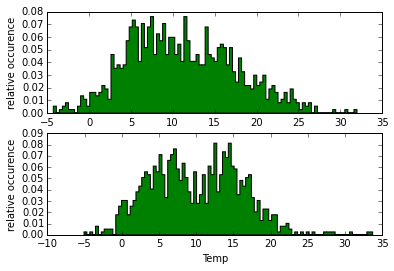

In [13]:
ThreePM = hourdata[15::24]
FiveAM = hourdata[5::24]

print "\n3pm mean: \t" + str(np.mean(ThreePM))
print "3pm varience: \t" + str(np.var(ThreePM))
print "\n5am mean: \t" + str(np.mean(FiveAM))
print "5am varience: \t" + str(np.var(FiveAM))

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
numBins = 100
ax.hist(ThreePM,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

ax = fig.add_subplot(2,1,2)
ax.hist(FiveAM, numBins, histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()

10.3016961717


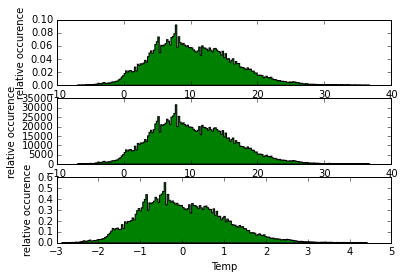

In [24]:
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
numBins = 200
ax.hist(minutedata,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

ax = fig.add_subplot(3,1,2)
numBins = 200
ax.hist(minutedata,numBins,histtype='stepfilled', color='green', normed=False)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

ax = fig.add_subplot(3,1,3)
numBins = 200

print np.mean(minutedata)
b=(minutedata-np.mean(minutedata))/(np.std(minutedata))

ax.hist(b,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()